In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

from keras.preprocessing import image

In [ ]:
train_dir = "/content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/train" # Directory containing the training data
test_dir = "/content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/test"  # Directory containing the validation data

In [ ]:
import pathlib

# Training data count
data_dir = pathlib.Path(train_dir)
train_folders = list(data_dir.glob('*'))
print("Training Data:")
for folder in train_folders:
    if folder.is_dir():
        image_count = len(list(folder.glob('*.jpg')))
        print(f"Folder '{folder.name}' contains {image_count} images.")

# Testing data count
data_dir = pathlib.Path(test_dir)
test_folders = list(data_dir.glob('*'))
print("\nTesting Data:")
for folder in test_folders:
    if folder.is_dir():
        image_count = len(list(folder.glob('*.jpg')))
        print(f"Folder '{folder.name}' contains {image_count} images.")

Training Data:
Folder 'Slippers' contains 146 images.
Folder 'Sandals' contains 306 images.
Folder 'Boots' contains 326 images.

Testing Data:
Folder 'Sandals' contains 25 images.
Folder 'Slippers' contains 33 images.
Folder 'Boots' contains 31 images.


Displaying images from 'Sandals'...


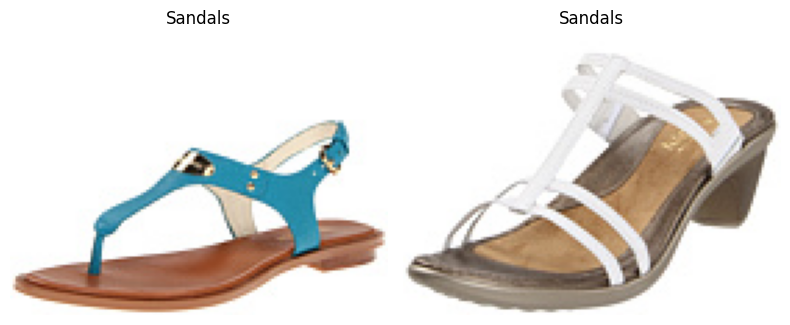

Displaying images from 'Slippers'...


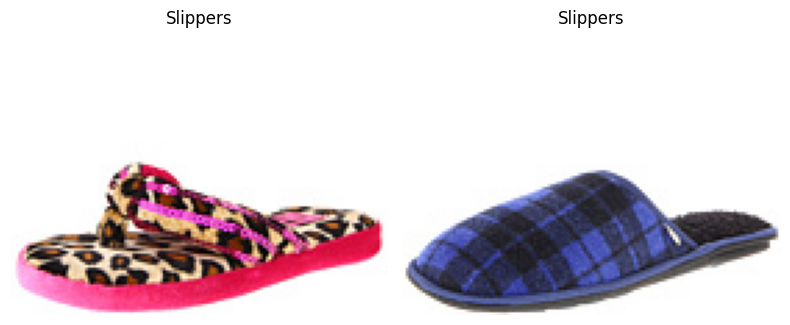

Displaying images from 'Boots'...


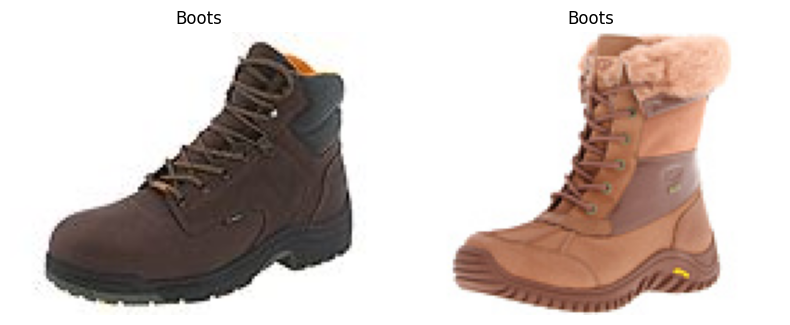

In [ ]:
import pathlib
import random
import matplotlib.pyplot as plt
from PIL import Image

train_folders = list(data_dir.glob('*'))  # Get all subfolders in the dataset directory


for folder in train_folders:
    if folder.is_dir():
        images = list(folder.glob('*.jpg'))
        if len(images) >= 2:
            selected_images = random.sample(images, 2)
            print(f"Displaying images from '{folder.name}'...")


            fig, axes = plt.subplots(1, 2, figsize=(8, 4))
            for ax, img_path in zip(axes, selected_images):
                img = Image.open(img_path)
                ax.imshow(img)
                ax.axis('off')
                ax.set_title(folder.name)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Folder '{folder.name}' has fewer than 2 images.")


In [ ]:

import matplotlib.pyplot as plt
import pathlib
from PIL import Image

# Assuming train_dir is defined as in your original code
train_dir = "/content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/train"
data_dir = pathlib.Path(train_dir)

# Function to get image dimensions
def get_image_dimensions(image_path):
  try:
    img = Image.open(image_path)
    return img.size  # Returns (width, height)
  except Exception as e:
    print(f"Error opening image {image_path}: {e}")
    return None

# Iterate through images in the training directory
for folder in data_dir.glob('*'):
  if folder.is_dir():
      for image_path in folder.glob('*.jpg'):
          dimensions = get_image_dimensions(image_path)
          if dimensions:
              width, height = dimensions
              print(f"Image: {image_path}, Width: {width}, Height: {height}")
              # You can break the loop here if you only need dimensions of the first image
              # break
          # You can break out of the inner loop if you want to check just one image per folder
          # break

Image: /content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/train/Slippers/slippers (104).jpg, Width: 136, Height: 102
Image: /content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/train/Slippers/slippers (10).jpg, Width: 136, Height: 102
Image: /content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/train/Slippers/slippers (100).jpg, Width: 136, Height: 102
Image: /content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/train/Slippers/slippers (105).jpg, Width: 136, Height: 102
Image: /content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/train/Slippers/slippers (1).jpg, Width: 136, Height: 102
Image: /content/drive/MyDrive/DL + AI Exam Paper/DL + AI Exam Paper/Dataset/CNN/Shoe Classification/train/Slippers/slippers (107).jpg, Width: 136, Height: 102
Image: /content/drive/MyDrive/DL + AI Exam Paper/

In [ ]:
image_size = (136, 102) # corrected image size based on the dimensions you provided
batch_size = 32
# Data augmentation and normalization
data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
# Training data generator
train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
# Validation data generator
validation_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 623 images belonging to 3 classes.
Found 155 images belonging to 3 classes.


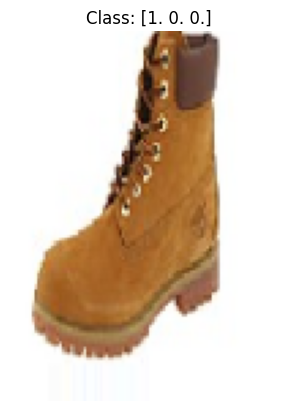

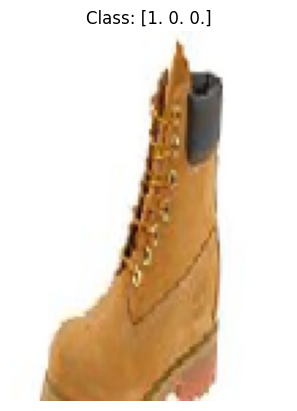

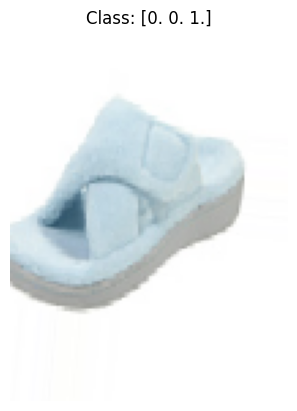

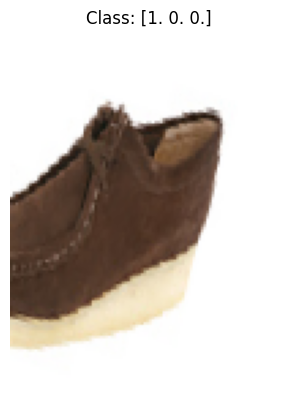

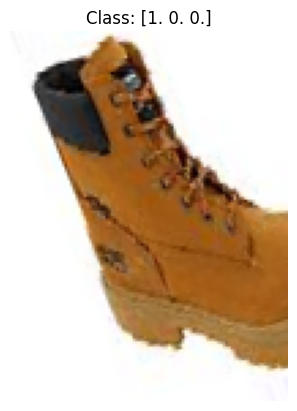

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(train_generator)

# Display the first 5 images
for i in range(5):
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i]}")
    plt.axis('off')
    plt.show()


In [ ]:
class_names = list(train_generator.class_indices.keys())
print(class_names)


['Boots', 'Sandals', 'Slippers']


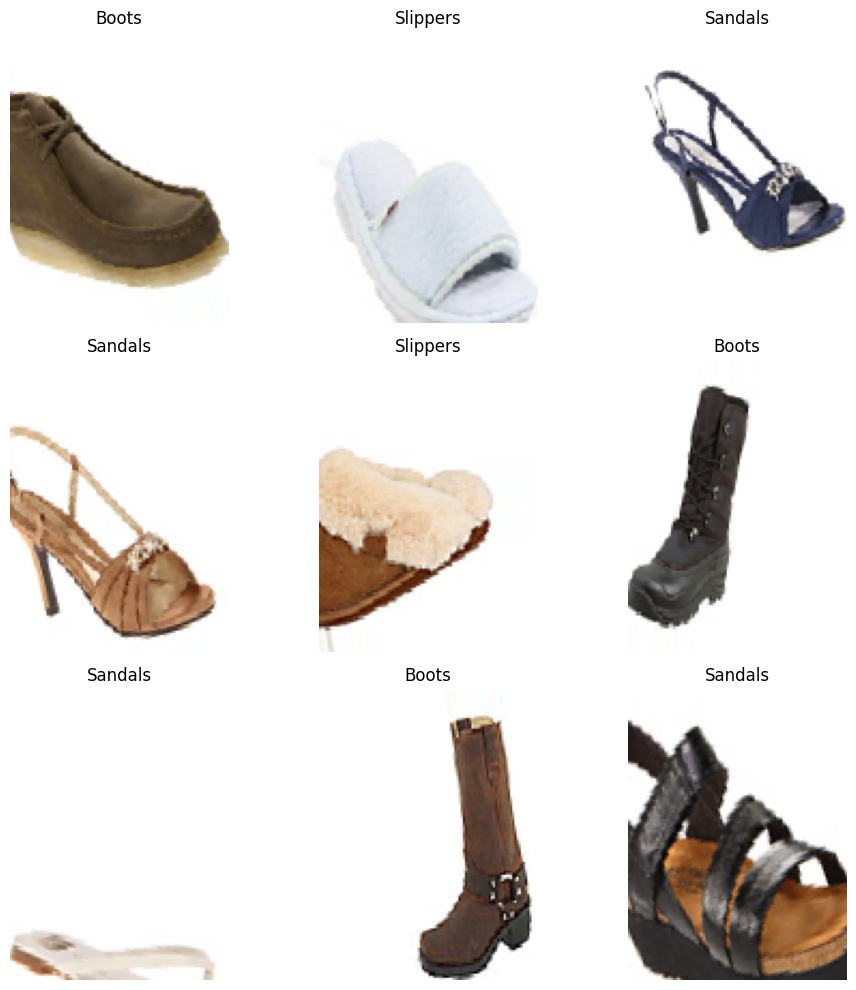

In [ ]:
class_names = list(train_generator.class_indices.keys())


plt.figure(figsize=(10, 10))


images, labels = next(train_generator)

for i in range(min(9, len(images))):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def softmax(z):
  '''Return the softmax output of a vector.'''
  exp_z = np.exp(z)
  sum = exp_z.sum()
  softmax_z = np.round(exp_z/sum,3)
  return softmax_z

In [ ]:
z = [0.25, 1.23, -0.8]
softmax(z)

array([0.249, 0.664, 0.087])

1. **Rescaling Layer:**

* layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)): This layer rescales the pixel values from the range [0, 255] to [0, 1] by dividing by 255. It also specifies the input shape, which includes the height and width of the image and the number of color channels (3 for RGB).
2. **Convolutional Layers:**

* layers.Conv2D(16, 3, padding='same', activation='relu'): This layer creates 16 convolutional filters of size 3x3. The padding='same' argument ensures that the output size is the same as the input size by adding zero padding around the edges. The activation function relu (Rectified Linear Unit) is applied to introduce non-linearity.
* layers.MaxPooling2D(): This layer performs max pooling with a 2x2 filter, which reduces the spatial dimensions of the output by a factor of 2.
* layers.Conv2D(32, 3, padding='same', activation='relu'): Similar to the first convolutional layer, but with 32 filters.
* layers.MaxPooling2D(): Another max pooling layer.
* layers.Conv2D(64, 3, padding='same', activation='relu'): Similar to the previous convolutional layers, but with 64 filters.
* layers.MaxPooling2D(): Another max pooling layer.
3. **Flatten Layer**:

* layers.Flatten(): This layer flattens the 3D output from the convolutional layers into a 1D vector, making it suitable for the fully connected layers that follow.

4. **Fully Connected (Dense) Layers**:

* layers.Dense(128, activation='relu'): This fully connected layer has 128 units with ReLU activation, adding more capacity for learning complex patterns.

* layers.Dense(num_classes, activation='softmax'): The output layer with num_classes units (5 in this case) and a softmax activation function, which is suitable for multi-class classification. The softmax function converts the output to a probability distribution over the classes.

In [ ]:
img_height = 102
img_width = 136
num_classes = 3
# Add more convolutional layers and increase the number of filters in each layer.
model = Sequential([
    layers.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Increased filters
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Increased filters
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'), # Increased filters and added a layer
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'), # Increased filters and added a layer
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'), # Increased Dense layer units
    BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1. **Optimizer:**

* optimizer='adam': The Adam optimizer is an efficient and popular choice for training deep learning models. It combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp, which makes it well-suited for problems with sparse gradients and noisy data.
2. **Loss Function:**

* loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): The sparse categorical crossentropy loss function is used for multi-class classification problems. The from_logits=True argument indicates that the model's output layer does not have a softmax activation function applied to it, meaning the outputs are raw logits. If your model's final layer uses a softmax activation (as in your model definition), you should set from_logits=False.
3. **Metrics:**

* metrics=['accuracy']: This specifies that the accuracy metric should be used to evaluate the model's performance during training and testing.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC, Precision, Recall

# Compile the model with additional metrics
model.compile(optimizer='rmsprop',  # Experiment with other optimizers like RMSprop or SGD
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class
              metrics=['accuracy', AUC(), Precision(), Recall()])
# Print the model summary for inspection
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 102, 136, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 102, 136, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 102, 136, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 51, 68, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 51, 68, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 51, 68, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 25, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 25, 34, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 25, 34, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 12, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 12, 17, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 12, 17, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 24576)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 24576)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │      12,583,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │           1,5

 Total params: 14,141,827 (53.95 MB)

 Trainable params: 14,138,883 (53.94 MB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 855ms/step - accuracy: 0.5133 - auc: 0.6955 - loss: 2.7901 - precision: 0.5233 - recall: 0.5010 - val_accuracy: 0.1871 - val_auc: 0.4083 - val_loss: 2.3288 - val_precision: 0.1871 - val_recall: 0.1871
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.6764 - auc: 0.8369 - loss: 1.0940 - precision: 0.6810 - recall: 0.6679 - val_accuracy: 0.1871 - val_auc: 0.3968 - val_loss: 3.9550 - val_precision: 0.1871 - val_recall: 0.1871
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.7691 - auc: 0.8923 - loss: 0.7812 - precision: 0.7759 - recall: 0.7570 - val_accuracy: 0.1871 - val_auc: 0.3968 - val_loss: 3.5292 - val_precision: 0.1871 - val_recall: 0.1871
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.7351 - auc: 0.9027 - loss: 0.7469 - precision: 0.7392 - recall: 0.7323 - val_accuracy: 0.1871 - val_auc: 0.3903 - val_loss: 5.8556 - val_precision: 0.1871 - val_recall: 0.1871
Epoch 5/500
20/20 ━━━━━━━━

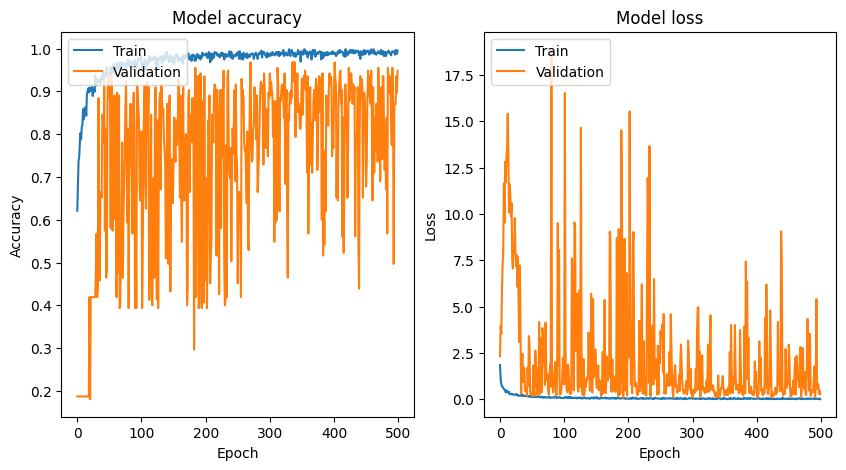

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step


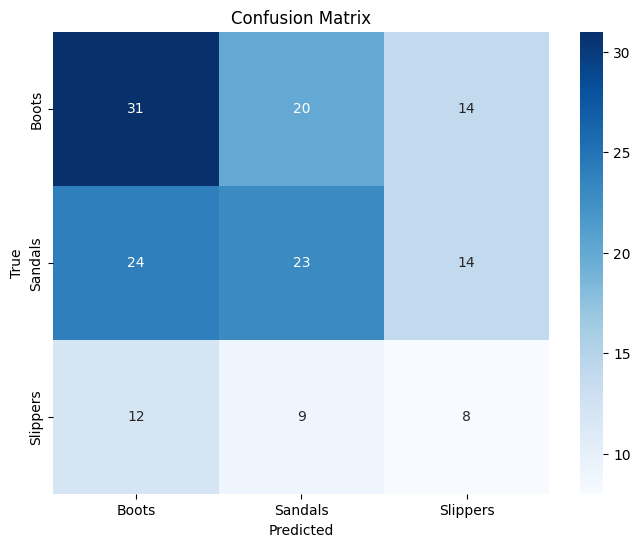

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 500
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Stop if validation loss doesn't improve for 10 epochs
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

# Evaluate the model
loss, accuracy, precision, recall, auc = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")
print(f"Validation AUC: {auc}")


# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print the accuracy
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 92.26%


In [ ]:
model.save(r'C:\Users\Shreyas\OneDrive\Desktop\footwear/trained_model.h5')  # Or model.save('/content/drive/MyDrive/trained_model.keras')

In [ ]:
import gradio as gr
import numpy as np



def predict_image(image):
    try:
        image = image.resize((136, 102))  # Resize the input image
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)
        image_array /= 255.0  # Normalize the image

        predictions = model.predict(image_array)
        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = np.max(predictions[0])
        return predicted_class, f"{confidence*100:.2f}%" # Return confidence as percentage
    except Exception as e:
      return "Error during prediction", str(e) # Handle potential errors

iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Textbox(label="Predicted Class"),
        gr.Textbox(label="Confidence"),
    ],
    title="Shoe Image Classifier",
    description="Upload an image to classify the type of shoe.",
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://389f1fbfe02f1cee4b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Found 89 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9746 - auc: 0.9899 - loss: 0.2666 - precision: 0.9746 - recall: 0.9746
Test Loss: 0.23628821969032288
Test Accuracy: 0.9775280952453613
Test Precision: 0.9910680651664734
Test Recall: 0.9775280952453613
Test AUC: 0.9775280952453613
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 448ms/step


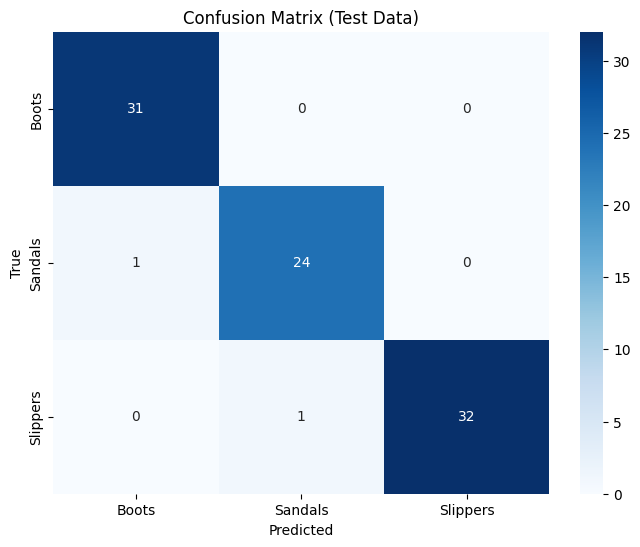

In [ ]:
# prompt: code to test now on test data

# Load the saved model
model = tf.keras.models.load_model(r'C:\Users\Shreyas\OneDrive\Desktop\footwear/trained_model.h5') # Or load from your Google Drive path

# Create a test data generator (similar to validation_generator but with your test data)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale, no augmentation for test data
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Replace with the path to your test data directory
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle test data
)

# Evaluate the model on the test data
loss, accuracy, precision, recall, auc = model.evaluate(test_generator)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test AUC: {auc}")


# Confusion Matrix for test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data)')
plt.show()